# Exercise 1
#### Correia Ambre & Jeannes Théo

In [403]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [404]:
def plot_graphs(*args):
    """
    Plots the graphs given as arguments
    
    :param args: The graphs to plot.
    Throws Exception: If there are more than 9 graphs to plot.
    """
    for G in args:
        units = args.index(G) + 1
        dizaines = len(args)
        try:
            num = 100 + dizaines * 10 + units
            plt.subplot(num)
            nx.draw(G, with_labels='True')
        except Exception as ignored:
            print('Too much graphs')
    plt.show()

In [405]:
def get_adjacency_matrix_direct_product_graph(G1, G2):
    """
    Calculates the adjacency matrix of the direct product graph of two undirected graphs
    
    :param G1: The first input graph.
    :param G2: The second input graph.
    :return: The adjacency matrix of the direct product graph.
    """
    A = nx.to_numpy_array(G1)
    B = nx.to_numpy_array(G2)
    m = A.shape[0]
    n = B.shape[0]
    P = np.zeros((m * n, m * n))

    for i in range(m):
        for j in range(n):
            for k in range(m):
                for l in range(n):
                    P[i * n + j, k * n + l] = A[i, k] * B[j, l]
    return P

In [406]:
def random_walk_kernel_similarity(G1, G2, k=4):
    """
    Compute the similarity between two graphs using the random walk kernel.
    :param G1: The first input graph.
    :param G2: The second input graph.
    :param k: Length of the random walks. Default is 4.
    :return: The similarity between the two graphs.
    """
    adjacency_one = get_adjacency_matrix_direct_product_graph(G1, G2)
    if adjacency_one.all() != nx.to_numpy_array(nx.tensor_product(G1, G2)).all():
        raise Exception("The adjacency matrix is not correct")
    adjacencies = np.zeros((k + 1, adjacency_one.shape[0], adjacency_one.shape[1]))
    adjacencies[0] = np.identity(adjacency_one.shape[0])
    adjacencies[1] = adjacency_one
    for i in range(2, k + 1):
        adjacencies[i] = np.matmul(adjacencies[i - 1], adjacency_one)
    return np.sum(adjacencies)

In [407]:

def print_results(graph1, graph2, graph3):
    """
    Prints the results of the random walk kernel similarity between two graphs.
    
    :param G1: The first input graph.
    :param G2: The second input graph.
    :param G3: The second input graph.
    """
    plot_graphs(graph1, graph2, graph3)
    print(f"The random walk kernel between G1 and G2 is {random_walk_kernel_similarity(graph1, graph2)}, while the similarity between G1 and G3 is {random_walk_kernel_similarity(graph1, graph3)}")


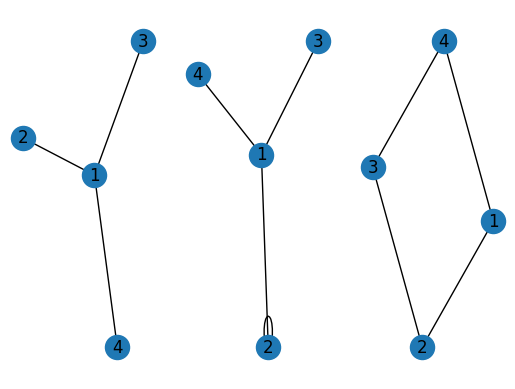

G x G' : 2866.0
G' x G" : 4984.0


In [408]:
G = nx.Graph([(1, 2), (1, 4), (1, 3)])
G_p = nx.Graph([(1, 2), (1, 4), (1, 3), (2, 2)])
G_s = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1)])
plot_graphs(G, G_p, G_s)
print(f"G x G' : {random_walk_kernel_similarity(G, G_p)}\n"
      f"G' x G\" : {random_walk_kernel_similarity(G_p, G_s)}")

The similarity between G and G' is lower than the similarity between G' and G", despite the edit distance being smaller from G to G' that the one between G' and G". 

The random walk kernel similarity is only the number of paths of length k in common between two graphs. The similarity between G and G' is lower than between G' and G" which seems counter-intuitive at first, but since there is a cycle in G' and G", the number of paths is higher, meaning more common paths.

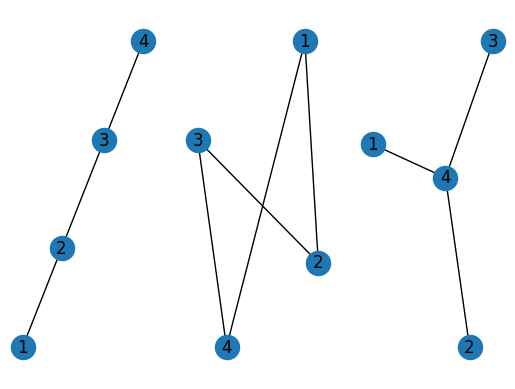

The random walk kernel between G1 and G2 is 2400.0, while the similarity between G1 and G3 is 1396.0


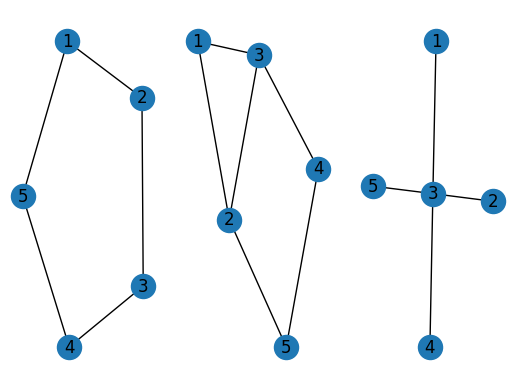

The random walk kernel between G1 and G2 is 18425.0, while the similarity between G1 and G3 is 8185.0


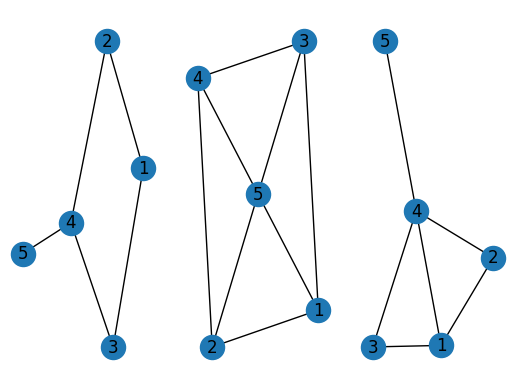

The random walk kernel between G1 and G2 is 63457.0, while the similarity between G1 and G3 is 29141.0


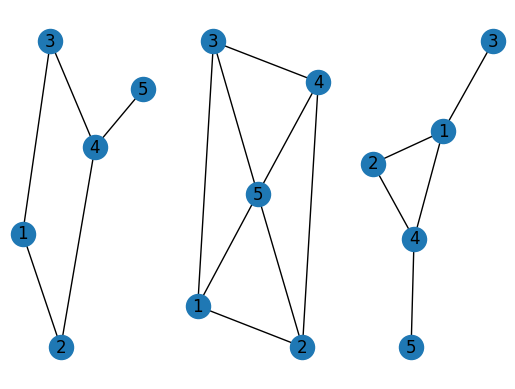

The random walk kernel between G1 and G2 is 63457.0, while the similarity between G1 and G3 is 15737.0


In [409]:
G1 = nx.Graph([(1, 2), (2, 3), (3, 4)])
G2 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1)])
G3 = nx.Graph([(1, 4), (4, 2), (4, 3)])

G4 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])
G5 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 2), (1, 3)])
G6 = nx.Graph([(4, 3), (3, 1), (3, 5), (3, 2)])

G7 = nx.Graph([(1, 2), (1, 3), (3, 4), (4, 2), (4, 5)])
G8 = nx.Graph([(1, 2), (1, 3), (1, 5), (2, 5), (2, 4), (4, 5), (4, 3), (3, 5)])
G9 = nx.Graph([(1, 2), (1, 3), (1, 4), (4, 2), (4, 3), (4, 5)])

G10 = nx.Graph([(1, 2), (1, 3), (3, 4), (4, 2), (4, 5)])
G11 = nx.Graph([(1, 2), (1, 3), (1, 5), (2, 5), (2, 4), (4, 5), (4, 3), (3, 5)])
G12 = nx.Graph([(1, 2), (1, 3), (1, 4), (4, 2), (4, 5)])

print_results(G1, G2, G3)
print_results(G4, G5, G6)
print_results(G7, G8, G9)
print_results(G10, G11, G12)